
# Project: Investigating no-show appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

    I have chosen the "no show appointment" dataset out of the five dataset options.
    This dataset has information collected from 100k medical appointments in Brazil and is focused on the question of whether
    or not patients show up for their appointment. 
    
    Project Walkthrough:
    Libraries used:
        ❖ pandas
        ❖ numpy
        ❖ matplotlib
        ❖ seaborn
        
    The dataset used here for analysis is a csv file. It had 110527 rows and 14 columns.
    The columns include appointment scheduled date, appointment date, age, gender, health condition(diabetes,
    hypertension, etc.,),and a column for appointment show up.
    The dataset is then assessed for any missing values, duplicate values, column datatypes etc.,
    After assessement the dataset is cleaned for EDA.
        ❖ Some of the cleaning carried out are: 
             1. Age had extreme values like -1 and over 110. Tried to keep the data which will be useful for analysis and 
                deleted the remaining.
             2. Changed the date columns from string to date datatypes.
             3. Made the column names readable.
    Then moved onto EDA where the follwing question are answered through various visualizations.

Few Questions I would like to explore are:
    1. Which gender has the highest proportion of no-show?
    2. What are the top 10 Neighbourhoods show up and no-show up rate?
    3. Which patient/condition is least likely to show up?
    4. Does longer waittime increases the chance for patients no-show up?

In [1]:
# import packages 

import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load the csv file print out a few lines. 

noshow_df=pd.read_csv('noshow_appt.csv')
print('Rows and columns in the file(dataframe):')
print('Number of rows: '+ str(noshow_df.shape[0]))
print('Number of columns: '+ str(noshow_df.shape[1]))


Rows and columns in the file(dataframe):
Number of rows: 110527
Number of columns: 14


In [3]:
#display first 5 rows in the dataframe
noshow_df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#check the datatypes of the columns
noshow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataframe info show there are 110527 row/records and 14 columns

In [5]:
#check if there are any null values in the dataframe
noshow_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Clearly, there are no null values in the table.

In [6]:
# check for any duplicate values
noshow_df[noshow_df.duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


And no duplicate data in the table as well.

### Data Cleaning -  Amending or removing data in the dataset that is incorrect, incomplete, improperly formatted, or duplicated.

 

In [7]:
#correcting the mispelled column names and changing it to snake case

noshow_df.rename(columns={'Handcap':'Handicap','Hipertension':'Hypertension'},inplace=True)
noshow_df.rename(columns={'PatientId':'Patient_id','AppointmentID':'Appointment_id',
                          'ScheduledDay':'Scheduled_day','AppointmentDay':'Appointment_day',
                           'No-show':'No_show'},inplace=True)
noshow_df.columns

Index(['Patient_id', 'Appointment_id', 'Gender', 'Scheduled_day',
       'Appointment_day', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'No_show'],
      dtype='object')

Now let us take a look at each of the columns, to clean, modify and/or add new columns as needed. To do this I will divide
the columns into four groups(just to clean the data) and gothrough each group one after the other.
Patient Info:
    Patient_id, Gender, Age
   
Appointment Info:
    Appointment_id, Scheduled_day, Appointment_day, Neighbourhood,
    
patient condition Info:
    Hypertension, Diabetes, Alcoholism, Handicap
    
Other Info:
    Neighbourhood,SMS_recieved, Scholarship, No_show
    


In [8]:
#take a look at patient info group(just the gender and age as patient id needs no change)

print(set(noshow_df['Gender']))
print(set(noshow_df['Age']))

{'F', 'M'}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115, -1}


By looking at the above output, the gender field needs no change but the age field has abnormal values like 0,-1 and over 100. Even though the average life span in Brazil is 74.68, I would keep the record from age range 1 to 100 and delete the remaining.


In [9]:
#Deleting the rows with strange age values
final_row_count = (noshow_df[(noshow_df['Age'] > 0) & (noshow_df['Age'] <= 100)]).shape[0]
del_row_count = noshow_df.shape[0] - final_row_count
print('Deleting ' + str(del_row_count) + ' rows with strange age values')
print('\n')
noshow_df = noshow_df[(noshow_df['Age'] > 0) & (noshow_df['Age'] <= 100)]
print('Values in Age column:')
print(set(noshow_df['Age']))

Deleting 3547 rows with strange age values


Values in Age column:
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100}


In [10]:
#display first five rows with Scheduled_day and Appointment_day columns
noshow_df.loc[:5,['Scheduled_day','Appointment_day']]

,Scheduled_day,Appointment_day
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z
5,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z


Will change the both column datatypes from string to datetime object.

In [11]:
#change the Scheduled_day and Appointment_day to datetime object
noshow_df['Scheduled_day'] = pd.to_datetime(noshow_df.Scheduled_day)
noshow_df['Appointment_day'] = pd.to_datetime(noshow_df.Appointment_day)
print(noshow_df.info())
print(noshow_df['Scheduled_day'].head())
print(noshow_df['Appointment_day'].head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106980 entries, 0 to 110526
Data columns (total 14 columns):
Patient_id         106980 non-null float64
Appointment_id     106980 non-null int64
Gender             106980 non-null object
Scheduled_day      106980 non-null datetime64[ns]
Appointment_day    106980 non-null datetime64[ns]
Age                106980 non-null int64
Neighbourhood      106980 non-null object
Scholarship        106980 non-null int64
Hypertension       106980 non-null int64
Diabetes           106980 non-null int64
Alcoholism         106980 non-null int64
Handicap           106980 non-null int64
SMS_received       106980 non-null int64
No_show            106980 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 17.2+ MB
None
0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: Scheduled_day, dtype: datetime64[ns]
0   2016-04-29
1   2016-04-29
2   2016-04-

Check the chronological order of Scheduled date and appointment date.
Find if there are any records with appointment date before the scheduled date and eliminate those erroneous data.

In [12]:
#Check the chronological order of scheduled date and appointment date
date_error_rows = noshow_df[noshow_df['Scheduled_day'].dt.date > noshow_df['Appointment_day'].dt.date]
date_error_rows

,Patient_id,Appointment_id,Gender,Scheduled_day,Appointment_day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


Lets get rid the five rows with appointment date before scheduled date

In [13]:
#delete the five rows
noshow_df = noshow_df[noshow_df['Scheduled_day'].dt.date <= noshow_df['Appointment_day'].dt.date]
print('Number of rows and columns after some cleanup: ' + str(noshow_df.shape))

Number of rows and columns after some cleanup: (106975, 14)


The awaiting time/days (ie the days between scheduled date and appointmnent date ) might be an importantant factor while analysing the rate of no-show, so adding a column called waiting_day.


In [14]:
#using numpy array to create a column called 'waiting_days' 

noshow_df['Waiting_days'] = np.where(noshow_df.Scheduled_day.dt.date == noshow_df.Appointment_day.dt.date,0,noshow_df.Appointment_day.sub(noshow_df.Scheduled_day))

noshow_df['Waiting_days'] = noshow_df['Waiting_days'].dt.days


In [15]:
noshow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106975 entries, 0 to 110526
Data columns (total 15 columns):
Patient_id         106975 non-null float64
Appointment_id     106975 non-null int64
Gender             106975 non-null object
Scheduled_day      106975 non-null datetime64[ns]
Appointment_day    106975 non-null datetime64[ns]
Age                106975 non-null int64
Neighbourhood      106975 non-null object
Scholarship        106975 non-null int64
Hypertension       106975 non-null int64
Diabetes           106975 non-null int64
Alcoholism         106975 non-null int64
Handicap           106975 non-null int64
SMS_received       106975 non-null int64
No_show            106975 non-null object
Waiting_days       106975 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(3)
memory usage: 13.1+ MB


In [16]:
print("Number of rows and columns in the dataframe: " + str(noshow_df.shape))

Number of rows and columns in the dataframe: (106975, 15)


Now lets take a look at the patient condition group.
Lets display first few rows of the four columns to see how the data is stored.

In [17]:
#using dataframe loc display the columns 
noshow_df.loc[:10,['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']]

,Hypertension,Diabetes,Alcoholism,Handicap
0,1,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,1,1,0,0
5,1,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


The data are stored in binary. 1 means patient has that condition and 0 mean that the patient doesn't have that condition.These four columns are clean, so we can move on to the next group ie 'other info'.
Lests display and take a look at the four columns under other info group.

In [18]:
#using dataframe loc to filter the columns
noshow_df.loc[:10,['Scholarship','Neighbourhood','SMS_received','No_show']]

,Scholarship,Neighbourhood,SMS_received,No_show
0,0,JARDIM DA PENHA,0,No
1,0,JARDIM DA PENHA,0,No
2,0,MATA DA PRAIA,0,No
3,0,PONTAL DE CAMBURI,0,No
4,0,JARDIM DA PENHA,0,No
5,0,REPÚBLICA,0,No
6,0,GOIABEIRAS,0,Yes
7,0,GOIABEIRAS,0,Yes
8,0,ANDORINHAS,0,No
9,0,CONQUISTA,0,No


These columns look clean too.Only thing we have to keep in mind is that the "No" in No_show column indicates that the patient did show up for the appointment.Now we can move on to the EDA.

<a id='eda'></a>
## Exploratory Data Analysis


Initial analysis before answering the questions:
    

In [19]:
#find the no-show rate

show_up = noshow_df[noshow_df.No_show == 'No'].shape[0]
noshow_up = noshow_df[noshow_df.No_show == 'Yes'].shape[0]
noshow_df.shape[0] == show_up + noshow_up
show_up_percent = show_up / noshow_df.shape[0] * 100
noshow_up_percent = noshow_up / noshow_df.shape[0] * 100

print('Total Appointments: '+ str(noshow_df.shape[0]))
print('Number of Show-ups: '+ str(show_up))
print('Number of No-show ups: ' + str(noshow_up))
print('Patients show up percentage: ' + str(round(show_up_percent,2)) + '%')
print('Patients no show up percentage:' + str(round(noshow_up_percent,2)) + '%')



Total Appointments: 106975
Number of Show-ups: 85303
Number of No-show ups: 21672
Patients show up percentage: 79.74%
Patients no show up percentage:20.26%


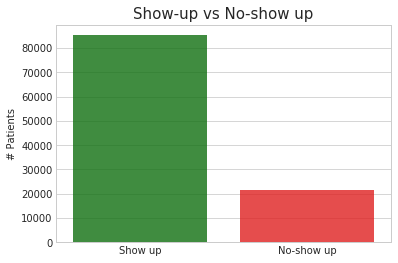

In [20]:
#plot the graph 
sns.set_style('whitegrid')
sns.countplot(noshow_df['No_show'], alpha =.80, palette= ['green','red'])

plt.title('Show-up vs No-show up',fontsize=15)
obj=['Show up','No-show up']
ticks = np.arange(len(obj))
plt.ylabel('# Patients')
plt.xticks(ticks,obj)
plt.xlabel('')
plt.show()

79.74% of patients showed up and 20.26% of patients didn't show up for their appointments. Now lets dig deeper and see out of this 20.26% which gender has the maximum no-show rate.


In [21]:
#create two list- one with female showup and no-show up and another with male showup and female no-show up
female = []
female.append(noshow_df[(noshow_df.No_show == 'No') & (noshow_df.Gender == 'F')].shape[0])
female.append(noshow_df[(noshow_df.No_show == 'Yes') & (noshow_df.Gender == 'F')].shape[0])

male = []
male.append(noshow_df[(noshow_df.No_show == 'No') & (noshow_df.Gender == 'M')].shape[0])
male.append(noshow_df[(noshow_df.No_show == 'Yes') & (noshow_df.Gender == 'M')].shape[0])


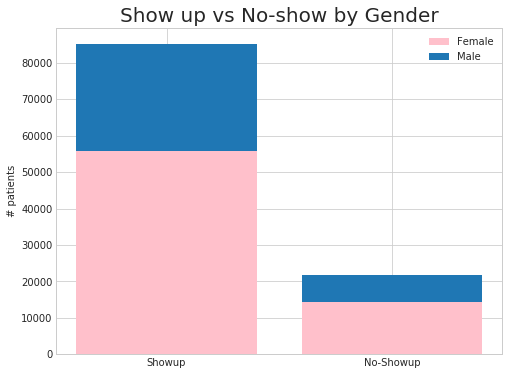

       Female show up count: 55839      Female No-show up count: 14269
       Male show up count: 29464        Male show up count: 7403


In [22]:
#plot the stacked bar using matplotlib
plt.figure(figsize=(8,6))
x=np.arange(len(female))
bar_width=.30
p1 = plt.bar(x,female,.80,label = 'Female',color='pink')
p2 = plt.bar(x,male,bottom=female,label='Male')
plt.title('Show up vs No-show by Gender',fontsize=20)
plt.xticks(x,['Showup','No-Showup'])
plt.ylabel('# patients')
plt.legend()
plt.show()

print('       Female show up count: ' + str(female[0]) + '      Female No-show up count: ' + str(female[1]))

print('       Male show up count: ' + str(male[0]) + '        Male show up count: ' + str(male[1]))



This shows Female patients visits doctor more often than male patients. Their showup count is higher than male.

### Research Question 1- Which gender has the highest proportion of no-show?

In [23]:
#find the number of male and female count and the percentage of no-show ups

noshow_gender = noshow_df[noshow_df.No_show == 'Yes'].groupby('Gender').No_show.value_counts()

percent_array=np.arange(2,dtype=float)
percent_array[0] = round((noshow_gender[0]/(noshow_gender[0]+noshow_gender[1])*100),2)
percent_array[1] = round((noshow_gender[1]/(noshow_gender[0]+noshow_gender[1])*100),2)

print('Percentage of Female no-show up: ' + str(percent_array[0]) + '%')
print('Percentage of Male no-show up: ' + str(percent_array[1]) + '%')


Percentage of Female no-show up: 65.84%
Percentage of Male no-show up: 34.16%


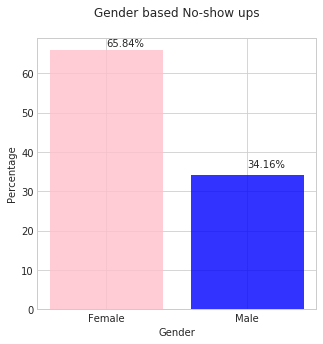

In [24]:
#plot a bar char showing the proportion of gender based no-show
y=[noshow_gender[0],noshow_gender[1]]
obj=['Female','Male']
ticks=np.arange(len(obj))
plt.figure(figsize=(5,5))
plt.bar(ticks,percent_array,.80,alpha=.80,color=['pink','blue'])
plt.xticks(ticks,obj)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Gender based No-show ups\n')
plt.show
for i,v in enumerate(ticks):
    label_str=str(percent_array[i])+'%'
    plt.text(i,v+1+percent_array[i],label_str)

Answer to question number 1:

The bar chart shows that 65.84% of females don't showup and only 34.16% of males don't show up for their appointment.So females have the higest proportion of no-show.

### Research Question 2- TOP 10 Neighbourhood show up and no-show up
###### There are 80 neighbourhoods in total. Let us pick top 10 high traffic neighbourhood and do the the analysis.

In [25]:
#this function takes a datafram as input and return a sorted neighbourhood list
def groupby_func(df,groupby):
    groupby_list = df.groupby([groupby]).size()
    return groupby_list

In [26]:
#plot the graph side by side showing the top 10 neighbourhood in show up and no-show up
def plot_graph(show_list1,noshow_list1):
    fig,(ax1,ax2) = plt.subplots(ncols=2,sharey=True)
    show_list1[0:10].plot(kind='bar',ax=ax1,figsize=(15,5),title='Top 10 Neighbourhood Show up')
    noshow_list1[0:10].plot(kind='bar',ax=ax2,figsize=(15,5),title='Top 10 Neighbourhood No Show up')

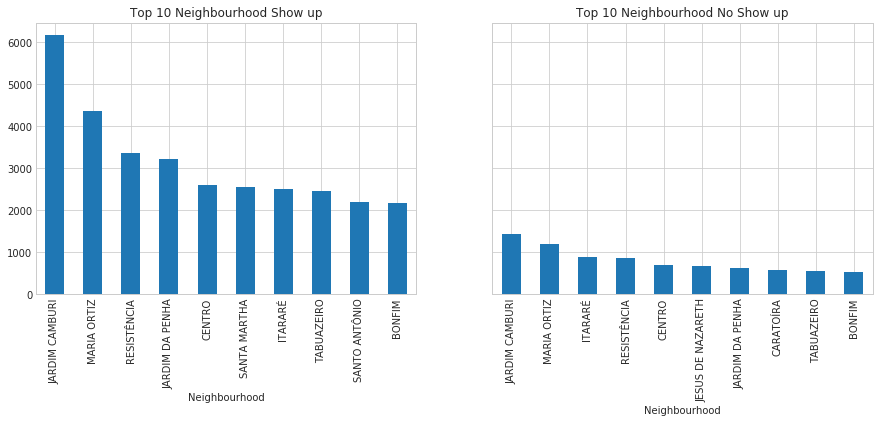

In [27]:
#create two list with neighbourhood name-one for showup and one for no-show up
#the function returns all the rows with 'No' in the No_show column
no_df = noshow_df.loc[noshow_df.No_show == 'No']
#the function returns all the rows with 'Yes' in the No_show column
yes_df = noshow_df.loc[noshow_df.No_show == 'Yes']

#call the function with the dataframe created with above statements
noshow_list = groupby_func(yes_df,'Neighbourhood')
noshow_list.sort_values(ascending=False,inplace=True)

show_list = groupby_func(no_df,'Neighbourhood')
show_list.sort_values(ascending=False,inplace=True)

#call the function that plots the graph 
plot_graph(show_list,noshow_list)



    

Answer to question number 2:

Jardim Camburi is busiest neighbourood of all with over 6000 appointment show ups and around 1500 no-show ups.The least among the 10 is Bonfim with over 2000 show-ups and around 500 no-show ups.

### Research Question 3- Which patient/condition is least likely to show up?

No_show      Category     No   Yes  No_Show_Rate
0          Alcoholism   2683   677         20.15
1            Diabetes   6513  1430         18.00
2            Handicap   2004   448         18.27
3        Hypertension  18028  3772         17.30
4         Scholarship   8238  2571         23.79


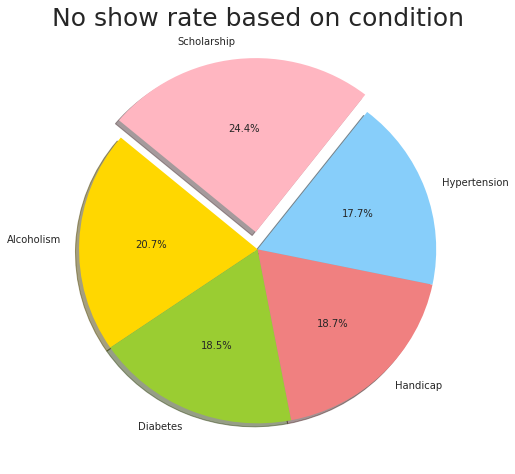

In [28]:
#calculate show up count,no-show up and no-show rate(percentage) count for each condition
#create a pivot table with the five columns of interest

pv = noshow_df.pivot_table(values=["Diabetes","Alcoholism","Hypertension","Handicap","Scholarship"],index='No_show',aggfunc=np.sum)

#unstack the pivot table to a dataframe
data = pv.unstack().unstack('No_show').reset_index().rename(columns={"index":"Category"})

#add a column for the no-show percentage
data["No_Show_Rate"] = round(data['Yes'] / (data['Yes'] + data['No'])*100,2)

print(data)
pie_values=data["No_Show_Rate"]

obj=data['Category']
explode = (0, 0, 0, 0,0.1)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','lightpink']
plt.figure(figsize=(8,8))
plt.pie(pie_values, explode=explode, labels=obj, colors=colors,autopct='%1.1f%%', shadow=True,startangle=140,center=(0,0))
plt.title('No show rate based on condition',fontsize=25)
plt.show()

Answer to question number 3:

From the pie chart we can see that patients who have enrolled for scholarship are very much likely to miss the appointments.
Leaving scholarship and when we compare the four patient conditions, the alocoholic patients are the least likely to show up for the appointment.All four patients show a similar or lower percentage of not attending apppointments compared to the general population.

### Research Question 4 - Does long await affect patients show up?


In [29]:
'''To find answer for this question I've created a dataframe called duplicate_df that holds 
the waiting days, showup count and no-show count for each waiting day.'''

#call the function to group the no-show dataframe(yes_df) by waiting days
noshow_waitdays = groupby_func(yes_df,'Waiting_days')

#call the function to group the show up dataframe(no_df) by waiting days
show_waitdays = groupby_func(no_df,'Waiting_days')


In [30]:
# convert the series object returned from the above function to dataframe and rename the column
show_waitdays = show_waitdays.to_frame()
show_waitdays.rename(columns={0:'show_count'},inplace=True)
show_waitdays['waiting_days'] = show_waitdays.index

noshow_waitdays = noshow_waitdays.to_frame()
noshow_waitdays.rename(columns={0:'noshow_count'},inplace=True)
noshow_waitdays['waiting_days']=noshow_waitdays.index


In [31]:
#Now merge the two dataframe using left join and store it in duplicate_df
duplicate_df = show_waitdays.merge(noshow_waitdays,how='left')

print('Null values count after merging:\n' )
print(duplicate_df.isnull().sum())
duplicate_df.dropna(inplace=True)


Null values count after merging:

show_count       0
waiting_days     0
noshow_count    19
dtype: int64


The null values are removed.

In [32]:
#checkinf if the nill values are removed
print(duplicate_df.isnull().sum())


show_count      0
waiting_days    0
noshow_count    0
dtype: int64


In [33]:
#change the noshow_count column back to int type(left join converted the noshow_count column to float) 
duplicate_df['noshow_count'] = duplicate_df['noshow_count'].astype(int)
duplicate_df['noshow_rate'] = duplicate_df['noshow_count']/(duplicate_df['noshow_count']+duplicate_df['show_count'])*100

#Reorder the columns for readability
col_title = ['waiting_days','show_count','noshow_count','noshow_rate']
duplicate_df = duplicate_df.reindex(columns=col_title)
print(duplicate_df.head(10))


   waiting_days  show_count  noshow_count  noshow_rate
0             0       39364          2816     6.676150
1             1        5051          1584    23.873399
2             2        2016           621    23.549488
3             3        4003          1209    23.196470
4             4        2350           846    26.470588
5             5        2975           975    24.683544
6             6        3514          1271    26.562173
7             7        1598           650    28.914591
8             8        1134           429    27.447217
9             9         928           432    31.764706


In [34]:
#find the percentile values and store it in a dataframe
describe_df = duplicate_df.describe(percentiles=[.10,.20,.30,.40,.50,.60,.70,.80,.90])
describe_df

,waiting_days,show_count,noshow_count,noshow_rate
count,104.000000,104.000000,104.000000,104.000000
mean,56.125000,819.750000,208.336538,32.230763
std,39.833802,3908.027237,389.028828,9.587196
min,0.000000,1.000000,1.000000,6.676150
10%,10.300000,5.000000,3.000000,22.066667
20%,20.600000,12.800000,8.000000,25.172414
30%,30.900000,41.900000,15.900000,29.558126
40%,41.200000,58.000000,31.200000,30.786388
50%,51.500000,81.000000,40.000000,32.043586
60%,61.800000,145.000000,70.200000,33.333333


Answer to question number 4:

From the above displayed data, we can clearly see that no-show up rate increases as the number of waiting days increases.So long await does affect the patients show up rate.
We can also see that the show up count is high for the max waiting day, which means more patients make appointments way ahead.

In [35]:
#plot a line graph for th above data(answer to question 4)
#create two list from the percentiles column and noshow rate column 
plot_df = describe_df.loc[['10%','20%','30%','40%','50%','60%','70%','80%','90%','max'],['noshow_rate']]
xaxis=plot_df.index
yaxis=plot_df['noshow_rate'].tolist()
print(xaxis)
print(yaxis)

Index(['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', 'max'], dtype='object')
[22.066666666666666, 25.172413793103452, 29.55812574139976, 30.786388332856735, 32.043586265902476, 33.33333333333333, 35.14928960581135, 36.769230769230774, 39.31488801054018, 75.0]


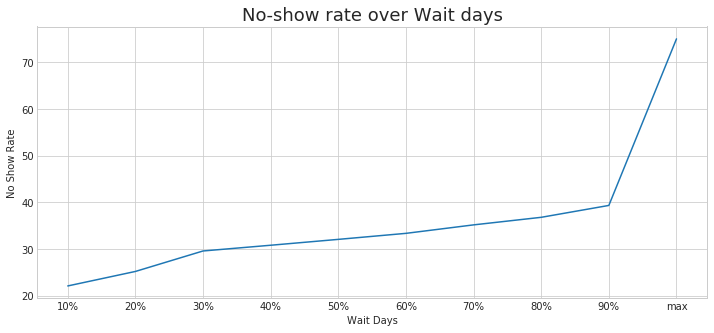

In [36]:
#plot the line using matplotlib
plt.figure(figsize=(12,5))
plt.plot(xaxis,yaxis)
plt.title('No-show rate over Wait days',fontsize=18)
plt.xlabel('Wait Days')
plt.ylabel('No Show Rate')
plt.show()

The longer the wait days between the scheduled date and appointment date the more the no show rate.

<a id='conclusions'></a>
## Conclusions

We have looked at most of the columns in our data set. 

    ❖First with this dataset we found that 79.74% of patients showed up for their appointment and 20.26% didn't show up.
      Futhermore out of this 20.26%, female patients are the more likely to miss their appointments than the male patients.

    ❖Then among the 80 neighbourhoods we found the top 10 neighbourhoods with high show up and no-show up.We come 
      to know the busiest neighbourhood with high show ups and no-show ups.

    ❖Next we picked the four patient condition(Alcoholism,Hypertension,Diabetes and Handicap) along with scholarship 
      for analysis of no-show rate. Patients with scholarships are more likely to miss the appointment and next the
      alcoholic patients.

    ❖Lastly, we found that longer the days between scheduled date and appointment date the more the patients miss 
      their appointments.

Eventhough we looked at lots of variables in the dataset, there are more variables that needs to be explored and analysed.The dataset contains a lot of information that will likely help us predict whether a patient will likely up or not. To device an accurate predictive model and to draw better conclusions, more in-depth analysis had to be done.

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0